El objetivo principal de este proyecto de Machine Learning será intentar predecir el género de una canción, usando un modelo de clasificación, basándonos en las características de la misma.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
generos_raw = pd.read_csv('../data/generos_spotify.csv')

In [3]:
generos_raw.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


El primer paso será comprobar si el dataset contiene canciones duplicadas y eliminarlas en caso de ser así:

In [4]:
generos_raw  = generos_raw.drop_duplicates(subset='track_name', keep='last')

ENTENDIENDO EL DATASET

In [5]:
generos_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23450 entries, 3 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  23450 non-null  object 
 1   track_name                23449 non-null  object 
 2   track_artist              23449 non-null  object 
 3   track_popularity          23450 non-null  int64  
 4   track_album_id            23450 non-null  object 
 5   track_album_name          23449 non-null  object 
 6   track_album_release_date  23450 non-null  object 
 7   playlist_name             23450 non-null  object 
 8   playlist_id               23450 non-null  object 
 9   playlist_genre            23450 non-null  object 
 10  playlist_subgenre         23450 non-null  object 
 11  danceability              23450 non-null  float64
 12  energy                    23450 non-null  float64
 13  key                       23450 non-null  int64  
 14  loudness   

Nuestro dataset contiene información sobre canciones de Spotify. Se compone de 23 columnas y 23450 registros en total, cada uno correspondiente a una canción diferente. Vemos que no hay nulos en ninguna de las columnas. Hay 9 columnas de tipo float y 4 de tipo integer, que serán nuestras variables numéricas. Por otra parte, hay 10 columnas de tipo objeto que contienen en su mayoría strings como nombres de artistas o canciones, URLs o códigos alfanuméricos de identificación de cada canción.

Vamos a proceder a analizar la información que nos brinda cada columna para deducir si será interesante para solucionar el problema que planteamos:

1. TRACK ID

In [6]:
generos_raw['track_id'].head()

3     75FpbthrwQmzHlBJLuGdC7
4     1e8PAfcKUYoKkxPhrHqw4x
6     2OAylPUDDfwRGfe0lYqlCQ
10    3eFJI470ALf1EYjywPRsJy
12    6e0CvGZf7CouOpYF8toXHC
Name: track_id, dtype: object

Esta columna consiste en un código compuesto por letras y números que sirve para la identificación de cada canción. Nosotros no usaremos esta variable en nuestro análisis

2. TRACK NAME

In [7]:
generos_raw['track_name'].head(10)

3                     Call You Mine - Keanu Silva Remix
4               Someone You Loved - Future Humans Remix
6                       Never Really Over - R3HAB Remix
10    Cross Me (feat. Chance the Rapper & PnB Rock) ...
12                                           Body On My
13       SOS - Laidback Luke Tribute Remix / Radio Edit
16                   All My Friends - Eden Prince Remix
19                           Let It Be Me - Sondr Remix
21       All Around The World (La La La) - Marnik Remix
22    Don't Leave Me Alone (feat. Anne-Marie) - EDX'...
Name: track_name, dtype: object

Esta columna contiene strings con los nombres de las canciones. Podríamos decir que el nombre de una canción no es una variable realmente útil o relevante a la hora de determinar el género de la misma así que tampoco la usaremos.

3. TRACK ARTIST

In [8]:
generos_raw['track_artist'].head(10)

3     The Chainsmokers
4        Lewis Capaldi
6           Katy Perry
10          Ed Sheeran
12         Loud Luxury
13              Avicii
16         AJ Mitchell
19          Steve Aoki
21               R3HAB
22        David Guetta
Name: track_artist, dtype: object

Esta columna contiene el nombre del artista de la canción. Para nuestra predicción de géneros no usaremos esta columna, ya que es posible que un mismo artista contenga canciones de muchos géneros diferentes.

4. TRACK POPULARITY

In [9]:
generos_raw['track_popularity'].head(10)

3     60
4     69
6     62
10    58
12    67
13    68
16    60
19    35
21    64
22    62
Name: track_popularity, dtype: int64

In [10]:
print('Valor mínimo de la variable: ', generos_raw['track_popularity'].min())
print('Valor máximo de la variable: ', generos_raw['track_popularity'].max())

Valor mínimo de la variable:  0
Valor máximo de la variable:  98


Esta columna nos muestra una métrica de la popularidad de una canción en una escala de 0 a 100. Cuanto mayor sea el valor, más popular es la canción en la plataforma de Spotify. Esta puntuación se calcula teniendo en cuenta diversos factores, como el número total de reproducciones de la canción y la frecuencia reciente de reproducción.

5. TRACK ALBUM ID

In [11]:
generos_raw['track_album_id'].head(10)

3     1nqYsOef1yKKuGOVchbsk6
4     7m7vv9wlQ4i0LFuJiE2zsQ
6     7INHYSeusaFlyrHSNxm8qH
10    49bXZtlI5kQSqQMSCnSaWO
12    2R66I0nzp3NnuUlzIGWQ5P
13    7Al4TIo0c5twNLfdOh1y1u
16    4lXBBbiEgwTzcfAkqdXJV1
19    097kyycr5ZuLS2cPwwUHwt
21    5r998zJ0MNYb2TTxyQmjxT
22    1WhPuMFm5VaTJqe9rl3C5Q
Name: track_album_id, dtype: object

Al igual que con track id, esta columna está compuesta por un código identificativo de cada álbum que no será útil para nuestro análisis

6. TRACK ALBUM NAME

In [12]:
generos_raw['track_album_name'].head(10)

3                           Call You Mine - The Remixes
4               Someone You Loved (Future Humans Remix)
6                       Never Really Over (R3HAB Remix)
10    Cross Me (feat. Chance the Rapper & PnB Rock) ...
12                                           Body On My
13                    SOS (Laidback Luke Tribute Remix)
16                   All My Friends (Eden Prince Remix)
19                               Let It Be Me (Remixes)
21       All Around The World (La La La) [Marnik Remix]
22    Don't Leave Me Alone (feat. Anne-Marie) [EDX's...
Name: track_album_name, dtype: object

Como ocurría con track name, esta variable nos da en formato string el nombre del álbum que contiene la canción en cuestión. Esta tampoco es una variable que vayamos a usar para nuestro análisis.

7. TRACK ALBUM REALEASE DATE

In [13]:
generos_raw['track_album_release_date'].head(10)

3     2019-07-19
4     2019-03-05
6     2019-07-26
10    2019-06-21
12    2019-03-29
13    2019-05-17
16    2019-05-03
19    2019-10-18
21    2019-08-23
22    2019-05-08
Name: track_album_release_date, dtype: object

Nuestro dataset incluye canciones lanzadas entre la década de los 60 y el año 2020. Esta columna tampoco será relevante a la hora de determinar el género de una canción.

8. PLAYLIST NAME

In [14]:
generos_raw['playlist_name'].head(10)

3     Pop Remix
4     Pop Remix
6     Pop Remix
10    Pop Remix
12    Pop Remix
13    Pop Remix
16    Pop Remix
19    Pop Remix
21    Pop Remix
22    Pop Remix
Name: playlist_name, dtype: object

In [15]:
print('Nombres diferentes de todas las listas: \n', generos_raw['playlist_name'].unique())
print('Cantidad de nombres diferntes: ', len(generos_raw['playlist_name'].unique()))

Nombres diferentes de todas las listas: 
 ['Pop Remix' 'Dance Pop' 'Dance Room' 'Cardio' 'Dance Pop Hits'
 'Pop Warmup 130 BPM' 'Dance Pop: Japan' 'K-Party Dance Mix'
 'Dance Pop Tunes' 'Pop / Dance' 'Todo Éxitos' '90s Dance Hits'
 'Christian Dance Party' 'Pop Dance Hits' 'Best of 2019 Dance Pop: Japan'
 'TUNES DANCE AND POP' 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s'
 'ELETRIC POP & DANCE' 'Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop'
 'The Sound of Post-Teen Pop' 'Post teen pop'
 'post-teen alternative, indie, pop (large variety)'
 'Pop Punk | Post-Hardcore' 'Post pop teen' 'Intro to Post-Teen Pop'
 '🤩🤪Post Teen Pop🤪🤩' 'Someone You Loved Lewis Capaldi (Pop Music Mix)'
 "Dr. Q's Prescription Playlist💊" 'a taste of the mainstream'
 'post teen pop' 'BALLARE - رقص' 'Post Teen Pop' 'Post-teen pop'
 'post-teen pop' 'Electro Pop | Electropop' 'Electropop Hits  2017-2020'
 'Electropop 2019' 'ELECTROPOP' 'This Is: Javiera Mena' 'ElectroPop 2020'
 'Electropop - Pop' 'This Is Janel

Esta columna incluye los nombres de las listas de reproducción en las que están incluídas las canciones. Tenemos 448 listas diferentes. Nosotros no usaremos esta variable a la hora de determinar el género de una canción. Es cierto que la mayoría de listas incluyen en su nombre el género de canciones que incluyen, pero nosotros nos vamos a centrar en otro tipo de variables como las características de la canción para desarrollar nuestro modelo.

9. PLAYLIST ID

In [16]:
generos_raw['playlist_id'].head(10)

3     37i9dQZF1DXcZDD7cfEKhW
4     37i9dQZF1DXcZDD7cfEKhW
6     37i9dQZF1DXcZDD7cfEKhW
10    37i9dQZF1DXcZDD7cfEKhW
12    37i9dQZF1DXcZDD7cfEKhW
13    37i9dQZF1DXcZDD7cfEKhW
16    37i9dQZF1DXcZDD7cfEKhW
19    37i9dQZF1DXcZDD7cfEKhW
21    37i9dQZF1DXcZDD7cfEKhW
22    37i9dQZF1DXcZDD7cfEKhW
Name: playlist_id, dtype: object

Otra columna compuesta por un código de identificación, en este caso de la playlist. Tampoco usaremos esto en nuestro análisis.

10. PLAYLIST GENRE +
11. PLAYLIST SUBGENRE

Para nuestro modelo de predicción, esta variable será nuestro target. Vamos a usar el género de la lista de reproducción en la que está incluida la canción para determinar el género de la misma. En nuestro dataset tenemos dos columnas que nos dan información sobre el género:

In [17]:
generos_raw['playlist_genre'].head(10)

3     pop
4     pop
6     pop
10    pop
12    pop
13    pop
16    pop
19    pop
21    pop
22    pop
Name: playlist_genre, dtype: object

In [18]:
print('Nombres diferentes de todos los géneros: \n', generos_raw['playlist_genre'].unique())
print('Cantidad de nombres diferntes: ', len(generos_raw['playlist_genre'].unique()))

Nombres diferentes de todos los géneros: 
 ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
Cantidad de nombres diferntes:  6


In [19]:
generos_raw['playlist_subgenre'].head(10)

3     dance pop
4     dance pop
6     dance pop
10    dance pop
12    dance pop
13    dance pop
16    dance pop
19    dance pop
21    dance pop
22    dance pop
Name: playlist_subgenre, dtype: object

In [20]:
print('Nombres diferentes de todos los subgéneros: \n', generos_raw['playlist_subgenre'].unique())
print('Cantidad de nombres diferntes: ', len(generos_raw['playlist_subgenre'].unique()))

Nombres diferentes de todos los subgéneros: 
 ['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']
Cantidad de nombres diferntes:  24


La clasificación más general mete todas las canciones en 6 géneros diferentes, mientras que la clasificación de subgénero distingue entre 24. A medida que avancemos en nuestro análisis determinaremos cuál de ellas podemos usar para nuestro análisis, si creamos una columna nueva incluyendo las dos, etc.

VIENE DEL NOTEBOOK DE PRUEBA DE MODELOS:

Vamos a analizar cómo son los subgéneros de pop:

C:\Users\Ibai Valente Lavado\AppData\Local\Temp\ipykernel_14004\2543750101.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(data=data, x='danceability', hue=hue, fill=True, palette=colores, ax=axes[0,0])
C:\Users\Ibai Valente Lavado\AppData\Local\Temp\ipykernel_14004\2543750101.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(data=data, x='energy', hue=hue, fill=True, palette=colores, ax=axes[0,1])
C:\Users\Ibai Valente Lavado\AppData\Local\Temp\ipykernel_14004\2543750101.py:11: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(data=data, x='speechiness', hue=hue, fill=True, palette=colores, ax=axes[0,2])
C:\Users\Ibai Valente Lavado\AppData\Local\Temp\ipykernel_14004\2543750101.py:13: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.kdeplot(data=data

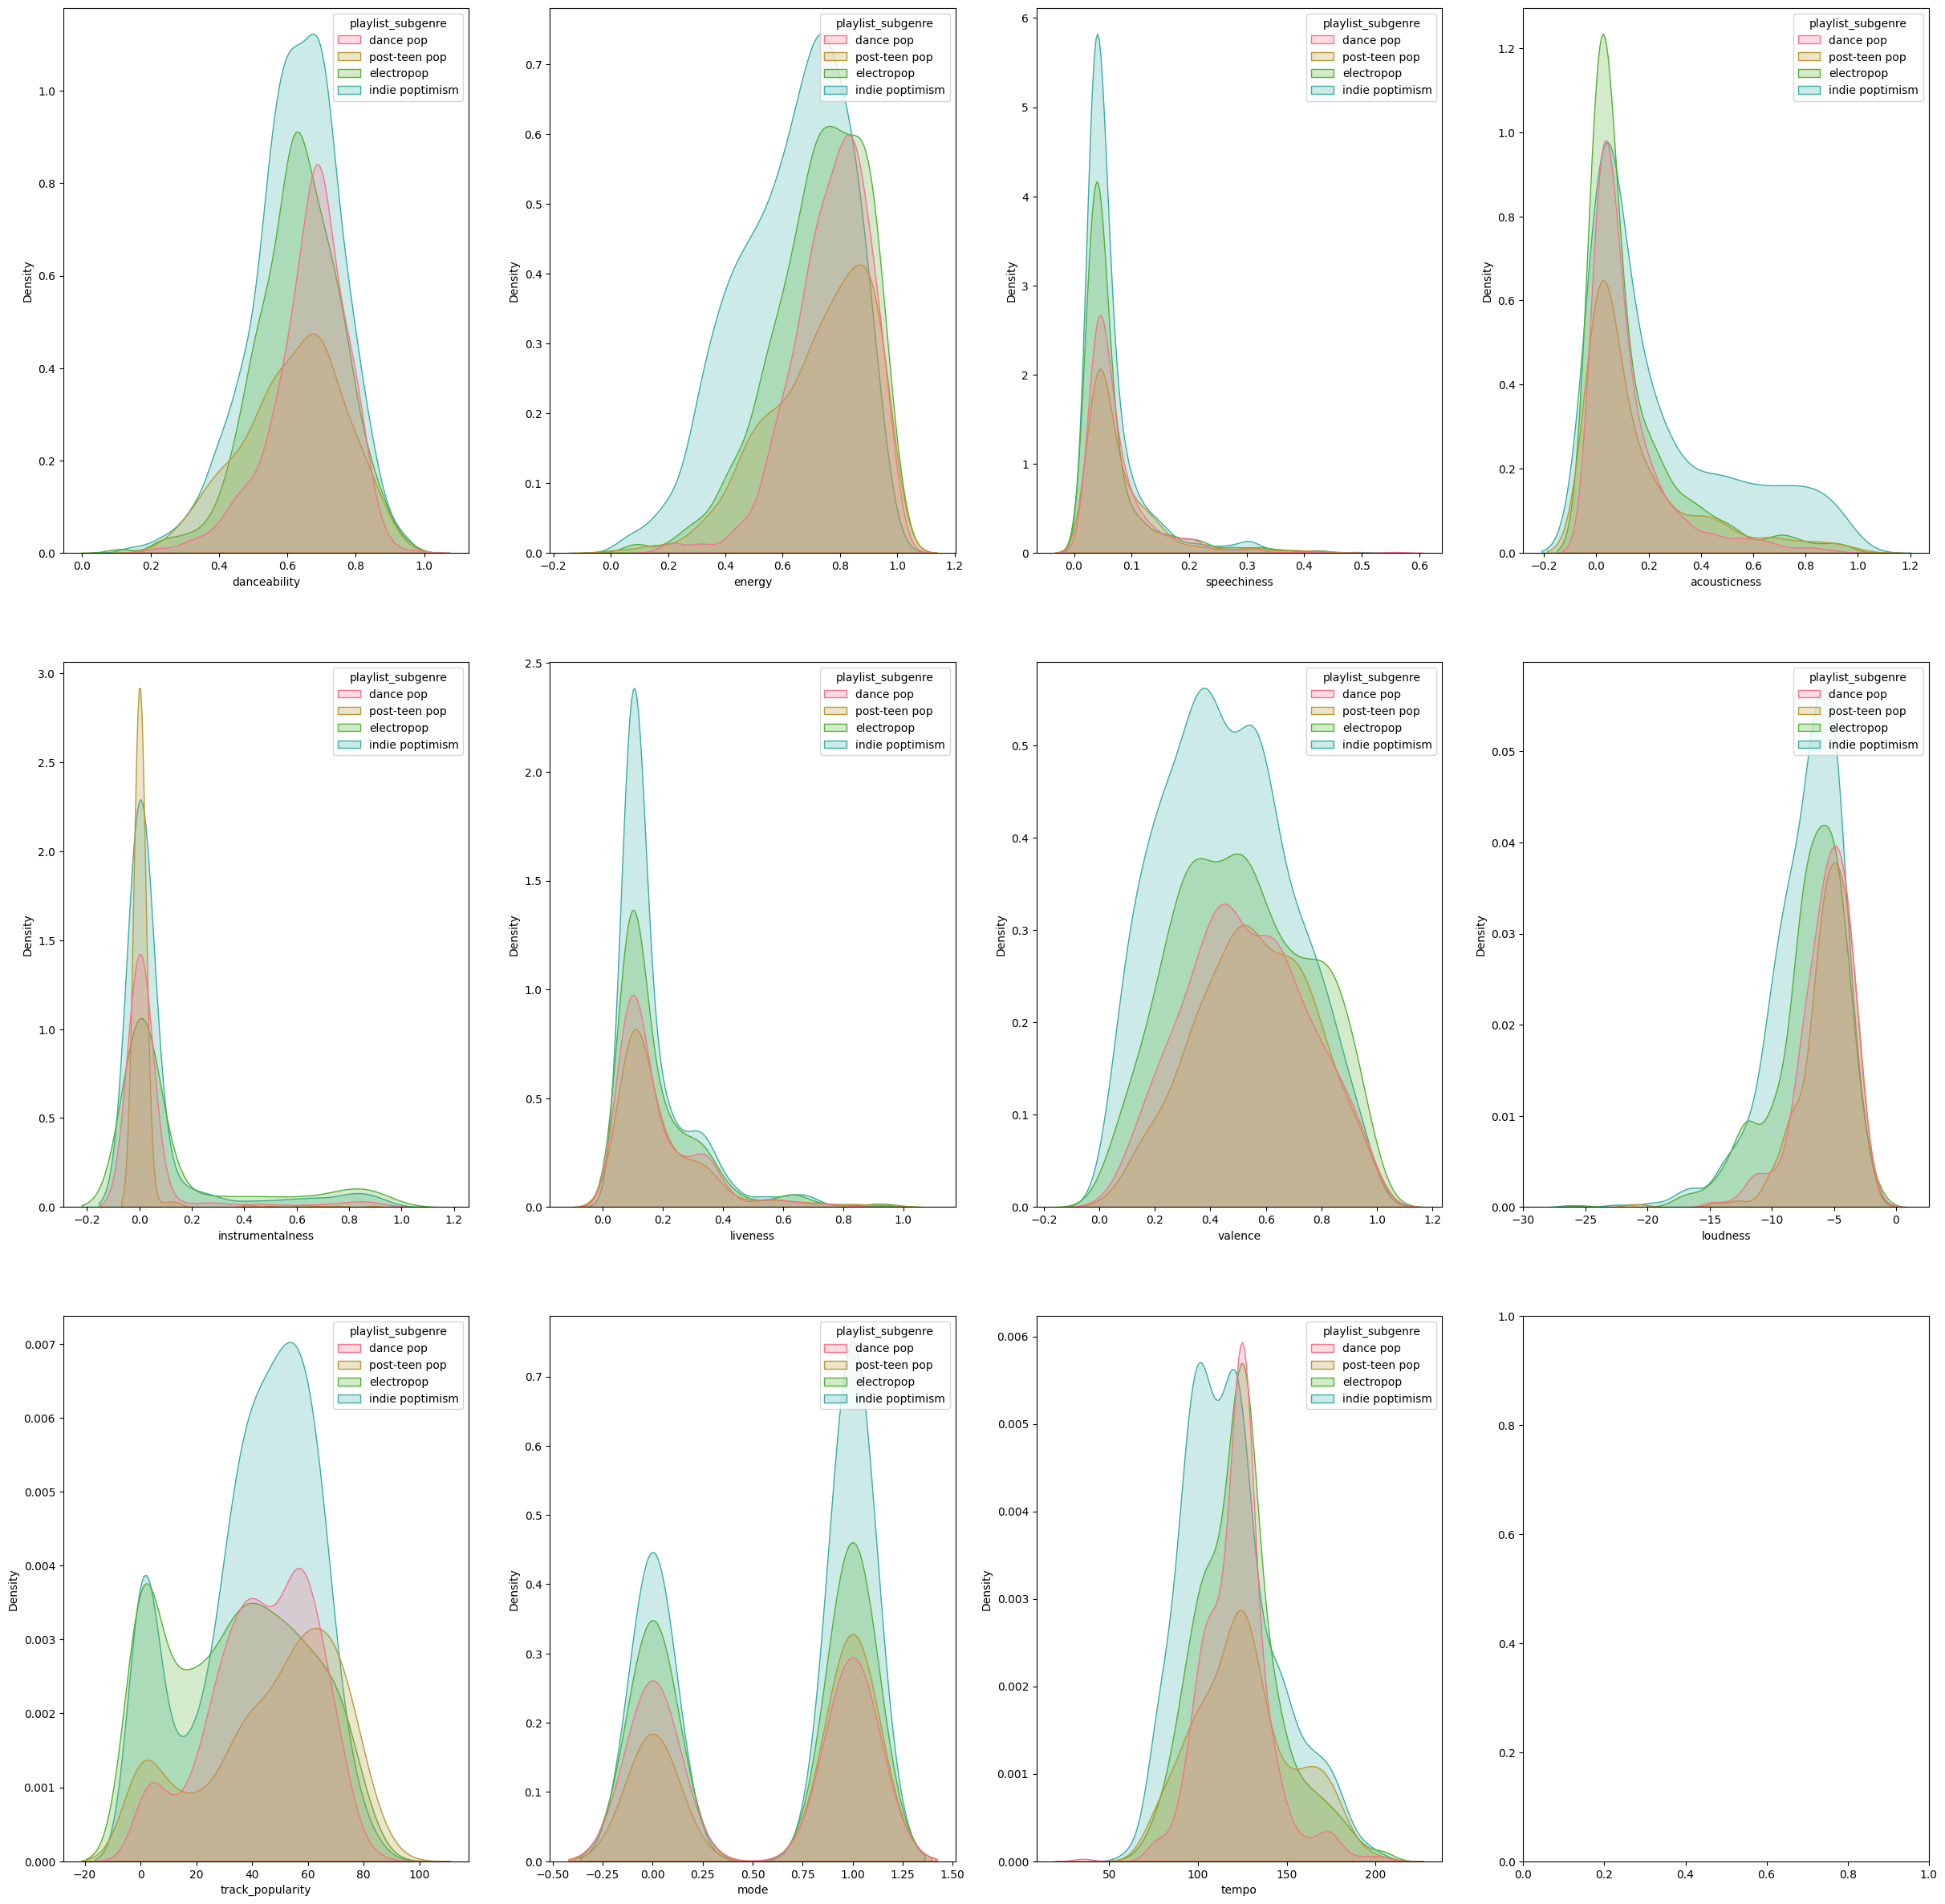

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 30))
colores = sns.color_palette("husl", 6)

data = generos_raw[generos_raw['playlist_genre'] == 'pop']
hue = 'playlist_subgenre'

sns.kdeplot(data=data, x='danceability', hue=hue, fill=True, palette=colores, ax=axes[0,0])

sns.kdeplot(data=data, x='energy', hue=hue, fill=True, palette=colores, ax=axes[0,1])

sns.kdeplot(data=data, x='speechiness', hue=hue, fill=True, palette=colores, ax=axes[0,2])

sns.kdeplot(data=data, x='acousticness', hue=hue, fill=True, palette=colores, ax=axes[0,3])

sns.kdeplot(data=data, x='instrumentalness', hue=hue, fill=True, palette=colores, ax=axes[1,0])

sns.kdeplot(data=data, x='liveness', hue=hue, fill=True, palette=colores, ax=axes[1,1])

sns.kdeplot(data=data, x='valence', hue=hue, fill=True, palette=colores, ax=axes[1,2])

sns.kdeplot(data=data, x='loudness', hue=hue, fill=True, palette=colores, ax=axes[1,3])

sns.kdeplot(data=data, x='track_popularity', hue=hue, fill=True, palette=colores, ax=axes[2,0])

sns.kdeplot(data=data, x='mode', hue=hue, fill=True, palette=colores, ax=axes[2,1])

sns.kdeplot(data=data, x='tempo', hue=hue, fill=True, palette=colores, ax=axes[2,2])

plt.show();

In [22]:
generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'pop'].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism'],
      dtype=object)

Existen 4 subgéneros que están clasificados dentro de pop. Viendo sus distribuciones en cada una de las variables, no percibimos demasiadas diferencias entre ellos, es decir, cada subgénero de pop no tiene unas características muy distintivas con respecto a los otros subgéneros de pop, todos se comportan de una manera bastante parecida. Es cierto que el subgénero de indie poptism es, por lo general, el que una mayor densidad tiene en todas las variables. Sin embargo sería complicado hacer una división entre distintos subgéneros de pop y probar modelos con ello.

Dentro de los subgéneros vemos que existen unos cuantos de ellos que engloban a un género juntado con pop. Vamos a analizar estos:

In [23]:
print('subgéneros de pop: ', generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'pop'].unique())
print('subgéneros de rap: ', generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'rap'].unique())
print('subgéneros de rock: ', generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'rock'].unique())
print('subgéneros de latin: ', generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'latin'].unique())
print('subgéneros de r&b: ', generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'r&b'].unique())
print('subgéneros de edm: ', generos_raw['playlist_subgenre'][generos_raw['playlist_genre'] == 'edm'].unique())

subgéneros de pop:  ['dance pop' 'post-teen pop' 'electropop' 'indie poptimism']
subgéneros de rap:  ['hip hop' 'southern hip hop' 'gangster rap' 'trap']
subgéneros de rock:  ['album rock' 'classic rock' 'permanent wave' 'hard rock']
subgéneros de latin:  ['tropical' 'latin pop' 'reggaeton' 'latin hip hop']
subgéneros de r&b:  ['urban contemporary' 'hip pop' 'new jack swing' 'neo soul']
subgéneros de edm:  ['electro house' 'big room' 'pop edm' 'progressive electro house']


Tenemos mezclas con pop en los siguientes casos: latin pop, pop edm.
Además existe otra mezcla más de géneros, que es latin hip hop.

Es posible que estas mezclas estén influyendo en el correcto reconocimiento de los géneros por parte de los modelos. Probaremos a eliminar las canciones que contengan estos subgéneros y ver qué resultado nos da:

In [24]:
generos_raw[(generos_raw['playlist_subgenre'] == 'latin pop') | (generos_raw['playlist_subgenre'] == 'pop edm') | (generos_raw['playlist_subgenre'] == 'latin hip hop')]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
17493,1npDfdIgKSiOwtDJJqgeBw,El Sol No Regresa,La Quinta Estacion,8,3akKzcllmwsg5jq6TK4P1d,Flores De Alquiler,2004-06-10,Latin Pop Classics,37i9dQZF1DX6ThddIjWuGT,latin,...,3,-4.057,1,0.0352,0.0399,0.000000,0.3730,0.697,127.878,228960
17494,6F9yAYUaNbUhdlQyt5uZ3b,La Incondicional,Luis Miguel,75,6JSqwckfTYWbJj4R1fdOOo,Busca Una Mujer,1988-11-25,Latin Pop Classics,37i9dQZF1DX6ThddIjWuGT,latin,...,10,-4.352,1,0.0309,0.2370,0.000000,0.1340,0.283,155.127,257027
17495,1HpIBHs03kKCxlrPthWXmL,Me Dediqué a Perderte,Alejandro Fernandez,9,1XIDdkj7xuSoDDyYseS7o3,Alejandro Fernandez 15 Años De Exitos,2003-05-09,Latin Pop Classics,37i9dQZF1DX6ThddIjWuGT,latin,...,8,-9.075,1,0.0748,0.4870,0.000002,0.1050,0.480,147.847,232893
17496,2xuke1OBFKsOJbsionFKUk,No Podrás,Cristian Castro,58,2rbcVsVBBzCi3gVdVj9Tji,The Best Of…,2016-10-01,Latin Pop Classics,37i9dQZF1DX6ThddIjWuGT,latin,...,10,-4.627,1,0.0284,0.0182,0.000157,0.4230,0.789,117.717,245573
17497,4XTMj7kd8DHLl0r7ghmEAr,Caraluna,Bacilos,69,5WGN7m5BK95GiuafTCL3JQ,Grandes Exitos,2006-05-23,Latin Pop Classics,37i9dQZF1DX6ThddIjWuGT,latin,...,9,-5.314,1,0.0675,0.1760,0.000000,0.1000,0.895,102.789,266160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31019,0FOPDqF7FBZwHITfKHMvLK,Easy Go,Grandtheft,47,3Ug1qFlfAfO2jKqZARNAJP,Easy Go,2016-11-04,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,5,-3.592,1,0.0779,0.1070,0.001670,0.0938,0.566,156.071,190912
31020,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,85,7oiJYvEJHsmYtrgviAVIBD,Back from the Edge,2016-10-28,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,10,-7.398,1,0.0590,0.6950,0.000000,0.0902,0.494,85.043,211467
31021,0ooWMXBBZF8GHMyZZKOX7S,Sunshine - Extended Mix,diMaro,10,0ksFvtN553hlguOJzrmccz,Sunshine (feat. Dillon Dixon),2016-12-30,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,4,-3.476,0,0.0896,0.1280,0.000000,0.2520,0.642,114.972,187842
31022,0SujigeT7cxuxBfhN3eOcp,Run Up,Major Lazer,10,5tk1rHDB0ZcqTAU7XDqKwA,Run Up,2017-01-26,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,1,-3.602,0,0.0681,0.1050,0.000002,0.0990,0.674,108.005,203180


In [25]:
filtro = (generos_raw['playlist_subgenre'] == 'latin pop') | (generos_raw['playlist_subgenre'] == 'pop edm') | (generos_raw['playlist_subgenre'] == 'latin hip hop')
generos_raw = generos_raw.drop(generos_raw[filtro].index)

12. DANCEABILITY

In [26]:
generos_raw['danceability'].head()

3     0.718
4     0.650
6     0.449
10    0.679
12    0.744
Name: danceability, dtype: float64

In [27]:
print('Valor mínimo de la variable: ', generos_raw['danceability'].min())
print('Valor máximo de la variable: ', generos_raw['danceability'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  0.983


Esta característica se expresa como un valor decimal en una escala del 0 al 1, donde 0 es la canción menos bailable y 1 es la canción más bailable. Algunos factores que influyen en la medida de danceability incluyen la velocidad del ritmo, la estabilidad del ritmo, la regularidad temporal y la fuerza del ritmo. En términos generales, una canción con una puntuación de danceability más alta tiende a ser más fácil de bailar.

Esta variable será importante a la hora de determinar el género

13. ENERGY

In [28]:
generos_raw['energy'].head()

3     0.930
4     0.833
6     0.856
10    0.923
12    0.726
Name: energy, dtype: float64

In [29]:
print('Valor mínimo de la variable: ', generos_raw['energy'].min())
print('Valor máximo de la variable: ', generos_raw['energy'].max())

Valor mínimo de la variable:  0.000175
Valor máximo de la variable:  1.0


Representa la intensidad y actividad percibida en una canción. Se expresa como un valor decimal en una escala del 0 al 1, donde 0 indica una canción de baja energía (más suave y más calmada), y 1 indica una canción de alta energía (más enérgica y activa).

La medida de energía tiene en cuenta varios elementos musicales para determinar la intensidad global de una canción. Esto puede incluir factores como la velocidad del tempo, la intensidad del sonido y otros elementos relacionados con la energía percibida en la música.

14. KEY

In [30]:
generos_raw['key'].head()

3     7
4     1
6     5
10    6
12    1
Name: key, dtype: int64

In [31]:
generos_raw['key'].unique()

array([ 7,  1,  5,  6,  9,  4, 11,  0, 10,  2,  3,  8], dtype=int64)

Indica la tonalidad principal o clave tonal de una canción. La tonalidad es el tono central alrededor del cual gravitan las notas de una pieza musical. En términos más simples, la clave tonal proporciona una referencia para las notas y acordes que se utilizan en una canción.

Cada número corresponde a una tonalidad específica según la convención siguiente:

0: C

1: C♯/D♭

2: D

3: D♯/E♭

4: E

5: F

6: F♯/G♭

7: G

8: G♯/A♭

9: A

10: A♯/B♭

11: B

Esta variable puede ser interesante a la hora de analizar el género de una canción ya que un género puede ser propenso a incluir más canciones en una tonalidad u otra

15. LOUDNESS

In [32]:
generos_raw['loudness'].head()

3    -3.778
4    -4.672
6    -4.788
10   -6.500
12   -4.675
Name: loudness, dtype: float64

In [33]:
print('Valor mínimo de la variable: ', generos_raw['loudness'].min())
print('Valor máximo de la variable: ', generos_raw['loudness'].max())

Valor mínimo de la variable:  -46.448
Valor máximo de la variable:  1.275


Representa la intensidad percibida del sonido de una canción. Se mide en decibelios (dB) y es un indicador de cuán fuerte o suave puede sonar una canción.

El valor de "loudness" puede ser positivo o negativo. Un valor negativo indica que la canción es más suave, mientras que un valor positivo indica que la canción es más fuerte. Cuanto más cercano a cero sea el valor, más equilibrado se considera el nivel de volumen.

16. MODE

In [34]:
generos_raw['mode'].head()

3     1
4     1
6     0
10    1
12    1
Name: mode, dtype: int64

In [35]:
generos_raw['mode'].unique()

array([1, 0], dtype=int64)

Representa el modo de la escala tonal de una canción. En términos musicales, el modo se refiere a la disposición de tonos y semitonos en una escala, y puede ser mayor o menor. La variable "mode" tiene dos posibles valores:

* 0: Modo menor
* 1: Modo mayor

En la música, las escalas mayores tienden a sonar más brillantes y alegres, mientras que las escalas menores tienden a tener un tono más melancólico o sombrío

17. SPEECHINESS

In [36]:
generos_raw['speechiness'].head()

3     0.1020
4     0.0359
6     0.0623
10    0.1810
12    0.0463
Name: speechiness, dtype: float64

In [37]:
print('Valor mínimo de la variable: ', generos_raw['speechiness'].min())
print('Valor máximo de la variable: ', generos_raw['speechiness'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  0.918


Mide el contenido hablado en una canción en comparación con el contenido musical. Se expresa como un valor decimal en una escala del 0 al 1, donde 0 indica que la canción es totalmente instrumental (sin contenido hablado) y 1 indica que la canción es completamente hablada (sin contenido musical). Será interesante comprobar si ciertos géneros tienden a tener valores más altos o bajos en esta variable.

18. ACOUSTICNESS

In [38]:
generos_raw['acousticness'].head()

3     0.0287
4     0.0803
6     0.1870
10    0.1460
12    0.0399
Name: acousticness, dtype: float64

In [39]:
print('Valor mínimo de la variable: ', generos_raw['acousticness'].min())
print('Valor máximo de la variable: ', generos_raw['acousticness'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  0.994


Es una medida que indica la probabilidad de que una canción sea acústica. Se expresa como un valor decimal en una escala del 0 al 1, donde 0 indica que la canción es altamente no acústica (es decir, tiene una mayor presencia de elementos electrónicos o producidos digitalmente) y 1 indica que la canción es altamente acústica.

19. INSTRUMENTALNESS

In [40]:
generos_raw['instrumentalness'].head()

3     0.000009
4     0.000000
6     0.000000
10    0.000005
12    0.000000
Name: instrumentalness, dtype: float64

In [41]:
print('Valor mínimo de la variable: ', generos_raw['instrumentalness'].min())
print('Valor máximo de la variable: ', generos_raw['instrumentalness'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  0.994


Es una medida que indica la probabilidad de que una canción sea instrumental, es decir, que no contenga voces o letras. Se expresa como un valor decimal en una escala del 0 al 1, donde 0 indica que la canción es altamente vocal (contiene voces) y 1 indica que la canción es altamente instrumental (sin voces).

Esta característica se basa en diversos aspectos musicales, como la presencia de voces, la energía vocal y otros elementos relacionados con la vocalización en la música. Un valor alto de "instrumentalness" sugiere que la canción tiene una mayor probabilidad de ser instrumental.

20. LIVENESS

In [42]:
generos_raw['liveness'].head()

3     0.2040
4     0.0833
6     0.1760
10    0.1240
12    0.3740
Name: liveness, dtype: float64

In [43]:
print('Valor mínimo de la variable: ', generos_raw['liveness'].min())
print('Valor máximo de la variable: ', generos_raw['liveness'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  0.996


Mide la probabilidad de que una canción haya sido grabada en vivo en lugar de en un estudio de grabación. Se expresa como un valor decimal en una escala del 0 al 1, donde 0 indica que la canción es probablemente una grabación de estudio y 1 indica que la canción es probablemente una grabación en vivo.

Esta característica se basa en varios aspectos, como la presencia de audiencia, la interacción con el público y otros elementos que sugieren la autenticidad de una actuación en vivo.

21. VALENCE

In [44]:
generos_raw['valence'].head()

3     0.277
4     0.725
6     0.152
10    0.752
12    0.687
Name: valence, dtype: float64

In [45]:
print('Valor mínimo de la variable: ', generos_raw['valence'].min())
print('Valor máximo de la variable: ', generos_raw['valence'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  0.99


Representa la positividad o negatividad percibida de una canción. Se expresa como un valor decimal en una escala del 0 al 1, donde 0 indica una canción con una valencia negativa (más triste o melancólica) y 1 indica una canción con una valencia positiva (más alegre o feliz).

Esta medida se basa en diversos elementos musicales que contribuyen a la percepción emocional de una canción, como el tono, la letra y otros aspectos relacionados con la expresión emocional.

22. TEMPO

In [46]:
generos_raw['tempo'].head()

3     121.956
4     123.976
6     112.648
10    121.984
12    121.985
Name: tempo, dtype: float64

In [47]:
print('Valor mínimo de la variable: ', generos_raw['tempo'].min())
print('Valor máximo de la variable: ', generos_raw['tempo'].max())

Valor mínimo de la variable:  0.0
Valor máximo de la variable:  219.991


Representa el ritmo o la velocidad de una canción y se mide en "beats per minute" (bpm), que indica el número de pulsaciones o golpes en un minuto. El tempo es un factor fundamental que influye en la sensación de velocidad y energía de una composición musical.

La "tempo" se expresa como un valor numérico que representa la cantidad de beats por minuto. Un "tempo" más alto indica una canción más rápida, mientras que un "tempo" más bajo indica una canción más lenta.

23. DURATION MS

In [48]:
generos_raw['duration_ms'].head()

3     169093
4     189052
6     187675
10    207894
12    192507
Name: duration_ms, dtype: int64

In [49]:
print('Valor mínimo de la variable: ', generos_raw['duration_ms'].min())
print('Valor máximo de la variable: ', generos_raw['duration_ms'].max())

Valor mínimo de la variable:  4000
Valor máximo de la variable:  517125


Representa la duración de una canción en milisegundos (ms). Es un valor numérico que indica la longitud total de la canción desde el inicio hasta el final, medida en milisegundos. Esta variable no es muy representativa a la hora de clasificar una canción en cuanto a su género.

----

Una vez que hemos entendido qué información nos da cada variable, hemos considerado que podrían ser relevantes 12 de ellas. Ahora tendremos que analizarlas una por una, viendo las características específicas de cada una y haciendo los ajustes necesarios. Las variables que hemos escogido son las siguientes:

Variables con valores de 0 a 1:
- Danceability
- Energy
- Speachiness
- Acousticness
- Instrumentalness
- Liveness
- Valence

Variables con valores de 0 a 100:
- Track popularity

Variables discretas entre 0 y 11:
- Key

Variable booleana:
- Mode

Otras variables:
- Tempo
- Loudness


En cuanto a nuestro target, tendremos que decidir si usamos la variable de genre o subgenre. Como hemos visto, una de ellas es más general que la otra englobando todas las canciones en 6 géneros, mientras que la otra hace una clasificación de 24 subgéneros. Para nuestro modelo terminaremos usando la más general, ya que 24 variables pueden ser demasiadas y contener aspectos muy similares entre sí, por lo que es posible que nuestro modelo terminara siendo menos preciso. Para futuros proyectos se podría intentar crear modelos que consigan hacer clasificaciones más precisas, sin embargo en este caso primaremos la precisión de un modelo que consiga clasificar correctamente en 6 géneros.

In [50]:
generos = generos_raw[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','track_popularity','key','mode','tempo','playlist_genre']]

In [51]:
generos = generos.rename(columns={
    'danceability' : 'bailable',
    'energy' : 'energia',
    'loudness' : 'volumen',
    'speechiness' : 'hablado',
    'acousticness' : 'acustico',
    'instrumentalness' : 'instrumental',
    'liveness' : 'directo',
    'valence' : 'valencia',
    'track_popularity' : 'popularidad',
    'key' : 'clave',
    'mode' : 'modo',
    'tempo' : 'tempo',
    'playlist_genre' : 'genero'
})

In [52]:
generos

,bailable,energia,volumen,hablado,acustico,instrumental,directo,valencia,popularidad,clave,modo,tempo,genero
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,60,7,1,121.956,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,69,1,1,123.976,pop
6,0.449,0.856,-4.788,0.0623,0.187000,0.000000,0.1760,0.1520,62,5,0,112.648,pop
10,0.679,0.923,-6.500,0.1810,0.146000,0.000005,0.1240,0.7520,58,6,1,121.984,pop
12,0.744,0.726,-4.675,0.0463,0.039900,0.000000,0.3740,0.6870,67,1,1,121.985,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,42,2,1,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,20,0,1,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,14,6,0,127.989,edm
32831,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,15,2,1,128.008,edm


Nuestro primer paso será mapear las distintas clases de nuestro target para pasar de palabras escritas a números, de modo que nuestro modelo lo pueda procesar:

In [53]:
generos['genero'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [54]:
generos['genero'] = generos['genero'].map({
    'pop' : 0,
    'rap' : 1,
    'rock' : 2,
    'latin' : 3,
    'r&b' : 4,
    'edm' : 5
})

De ahora en adelante nuestras clases del target se traducirán de la siguiente manera:

0 = pop

1 = rap

2 = rock

3 = latin

4 = r&b

5 = edm

In [55]:
generos['genero']

3        0
4        0
6        0
10       0
12       0
        ..
32828    5
32829    5
32830    5
32831    5
32832    5
Name: genero, Length: 20033, dtype: int64

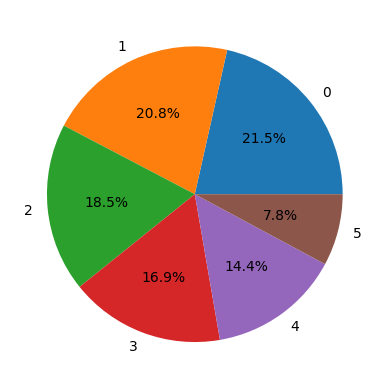

In [56]:
plt.pie(generos['genero'].value_counts(), labels=generos['genero'].unique(), autopct='%1.1f%%');

Vemos que la cantidad de canciones de cada género está bastante equilibrada por lo que esto no será un problema.

In [57]:
generos.columns

Index(['bailable', 'energia', 'volumen', 'hablado', 'acustico', 'instrumental',
       'directo', 'valencia', 'popularidad', 'clave', 'modo', 'tempo',
       'genero'],
      dtype='object')

Comenzaremos analizando las 7 variables que contienen valores entre contienen valores entre 0 y 1:

* BAILABLE

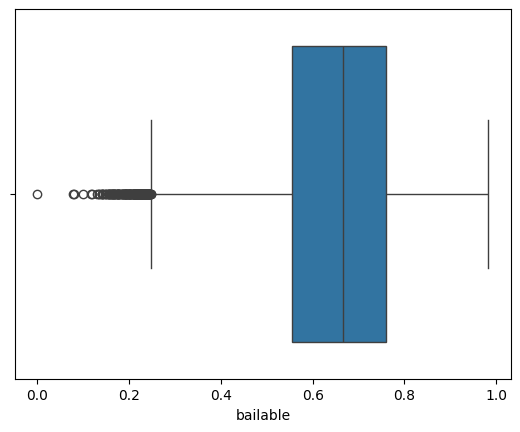

In [58]:
sns.boxplot(generos['bailable'], orient='h');

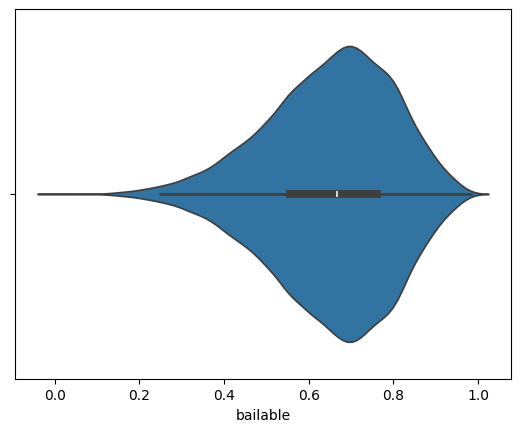

In [59]:
sns.violinplot(generos['bailable'], orient='h');

In [60]:
len(generos['bailable'][generos['bailable'] < 0.25])

170

Vemos que la cantidad de registros que podríamos considerar outliers no es muy grande en comparación con la cantidad total de registros que tenemos en el dataset así que dejaremos esta variable así.

* ENERGIA

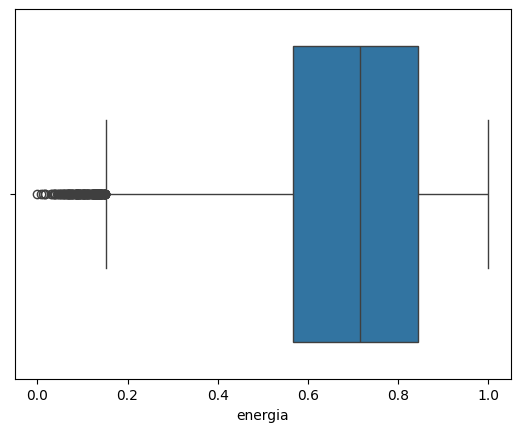

In [61]:
sns.boxplot(generos['energia'], orient='h');

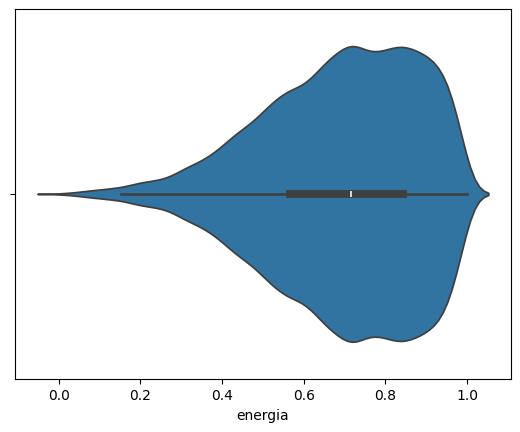

In [62]:
sns.violinplot(generos['energia'], orient='h');

In [63]:
len(generos['energia'][generos['energia'] < 0.2])

250

Estamos ante un caso parecido a la variable anterior, parece que no hay valores atípicos que puedan afectar negativamente el rendimiento del modelo

* HABLADO

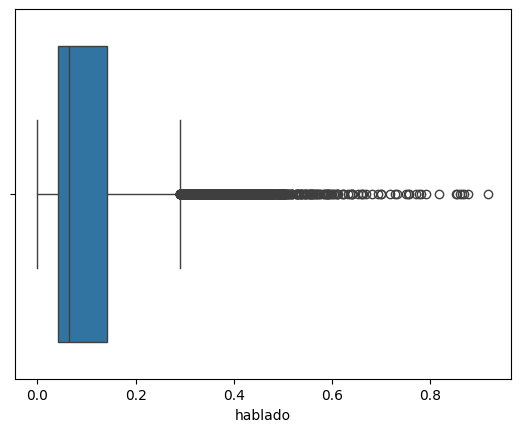

In [64]:
sns.boxplot(generos['hablado'], orient='h');

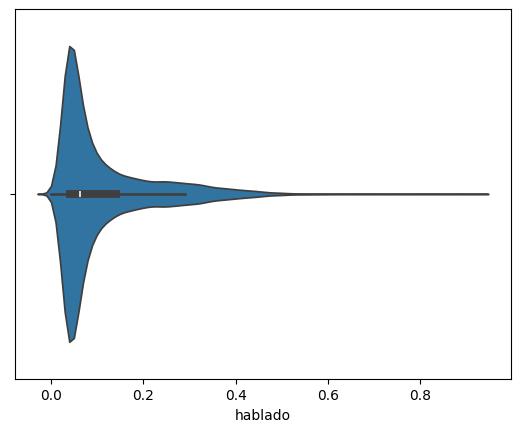

In [65]:
sns.violinplot(generos['hablado'], orient='h');

In [66]:
generos['hablado'].describe()

count    20033.000000
mean         0.111522
std          0.106633
min          0.000000
25%          0.041100
50%          0.063500
75%          0.141000
max          0.918000
Name: hablado, dtype: float64

In [67]:
generos['hablado'][generos['hablado'] > 0.25]

208      0.321
326      0.314
376      0.266
566      0.264
573      0.406
         ...  
32680    0.285
32694    0.260
32737    0.318
32751    0.292
32816    0.283
Name: hablado, Length: 2498, dtype: float64

* ACUSTICO

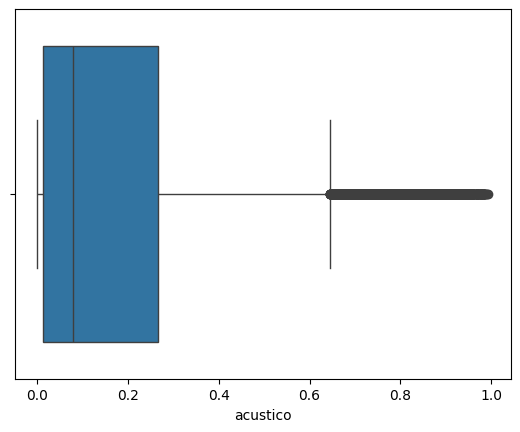

In [68]:
sns.boxplot(generos['acustico'], orient='h');

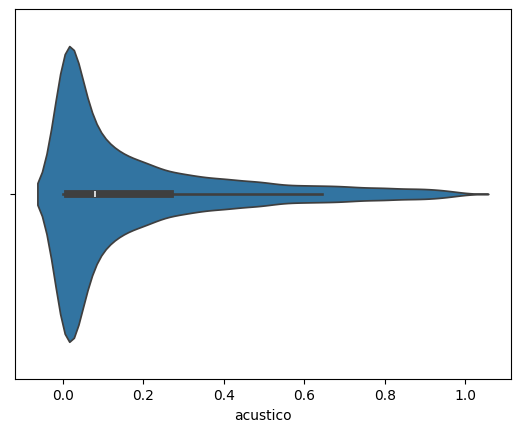

In [69]:
sns.violinplot(generos['acustico'], orient='h');

In [70]:
generos['acustico'][generos['acustico'] > 0.65]

403      0.693
475      0.656
577      0.798
738      0.814
745      0.762
         ...  
31271    0.689
31629    0.788
31982    0.713
32013    0.681
32044    0.837
Name: acustico, Length: 1372, dtype: float64

* INSTRUMENTAL

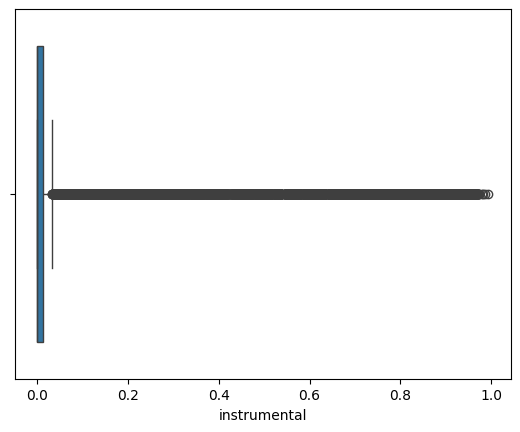

In [71]:
sns.boxplot(generos['instrumental'], orient='h');

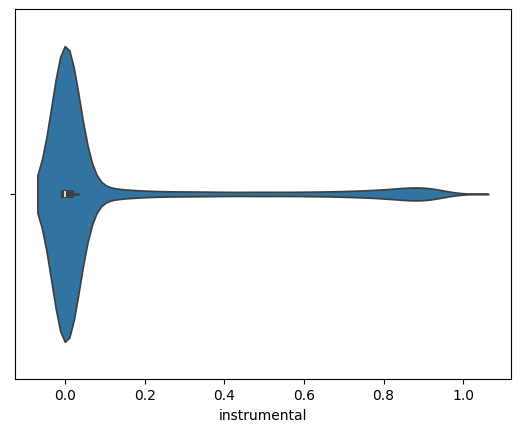

In [72]:
sns.violinplot(generos['instrumental'], orient='h');

In [73]:
generos['instrumental'][generos['instrumental'] > 0.15]

45       0.746
169      0.676
202      0.523
342      0.922
350      0.633
         ...  
32808    0.768
32817    0.506
32819    0.932
32823    0.219
32832    0.341
Name: instrumental, Length: 3236, dtype: float64

* DIRECTO

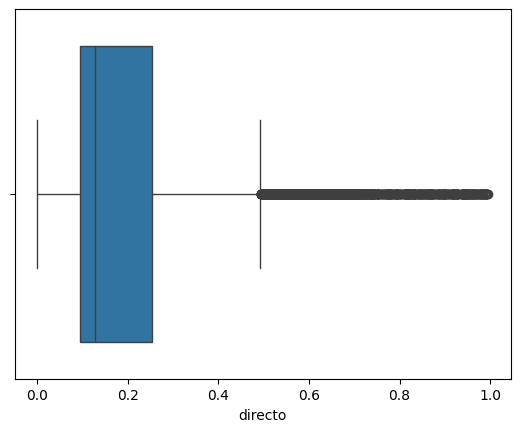

In [74]:
sns.boxplot(generos['directo'], orient='h');

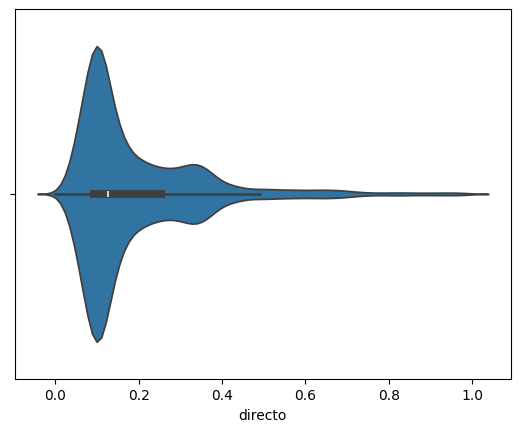

In [75]:
sns.violinplot(generos['directo'], orient='h');

In [76]:
generos['directo'][generos['directo'] > 0.6]

181      0.704
188      0.834
249      0.720
411      0.652
626      0.635
         ...  
32703    0.696
32713    0.667
32724    0.787
32731    0.699
32832    0.742
Name: directo, Length: 713, dtype: float64

* VALENCIA

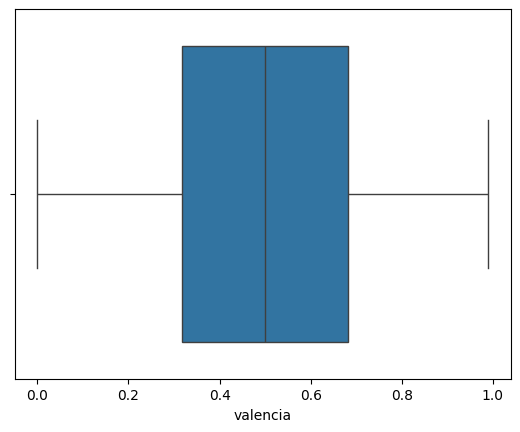

In [77]:
sns.boxplot(generos['valencia'], orient='h');

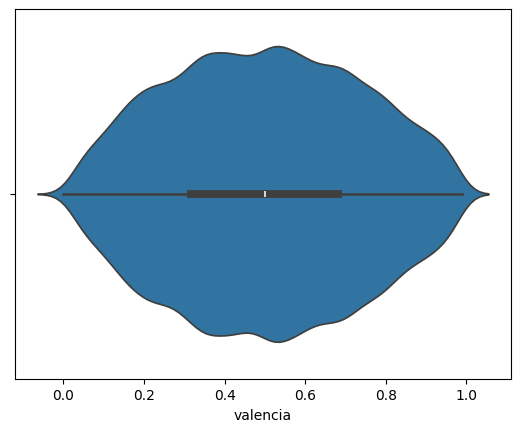

In [78]:
sns.violinplot(generos['valencia'], orient='h');

Esta feature está bastante bien distribuida por lo que no haremos ningún cambio

Ahora comenzaremos con el análsis de las demás variables, que no están en una escala de 0 a 1. Empezamos con la variable volumen:

* VOLUMEN

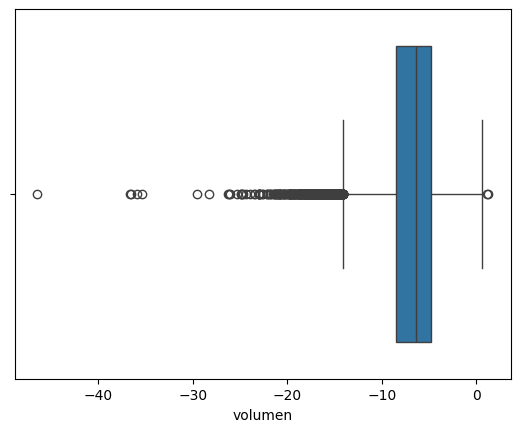

In [79]:
sns.boxplot(generos['volumen'], orient='h');

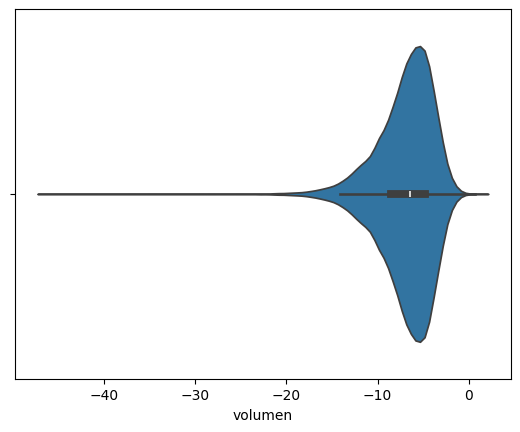

In [80]:
sns.violinplot(generos['volumen'], orient='h');

In [81]:
generos['genero'][generos['volumen'] < -13]

839      0
845      0
1188     0
1204     0
1511     0
        ..
31688    5
31690    5
31703    5
32641    5
32647    5
Name: genero, Length: 912, dtype: int64

* POPULARIDAD

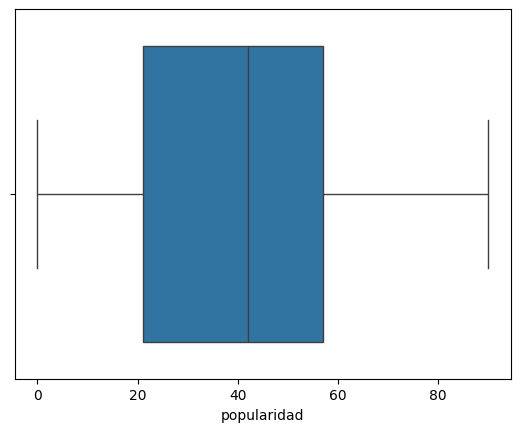

In [82]:
sns.boxplot(generos['popularidad'], orient='h');

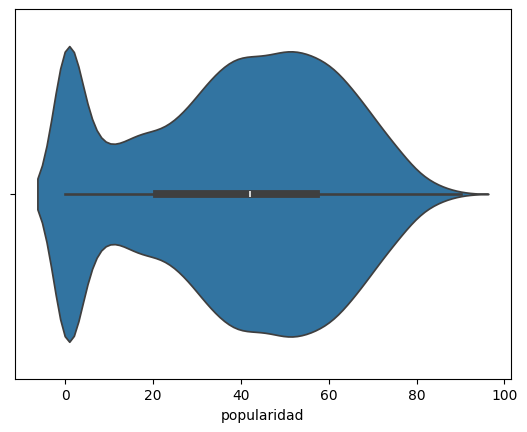

In [83]:
sns.violinplot(generos['popularidad'], orient='h');

In [84]:
generos['popularidad'][generos['popularidad'] < 10]

27       8
118      5
159      8
168      5
250      2
        ..
32813    0
32814    1
32818    1
32821    0
32822    0
Name: popularidad, Length: 3462, dtype: int64

Vamos a eliminar todas las canciones que tengan un valor menor a 10 sobre 100 en la categoría de popularidad. Damos por hecho que estos valores tan bajos no se deben a la clasificación de género que tengan, sino que no han cumplido un mínimo de características en cuanto a reproducciones para que Spotify pueda computar correctamente su valor.

In [85]:
generos.drop(generos[generos['popularidad'] < 10].index, inplace=True)

* CLAVE

Esta variable es categórica, es decir, cada valor corresponde a la clave en la que está la canción, por lo que no podemos usar los boxplot y violinplot usados anteriormente. Vemos que las diferentes clases de esta variable no son representativas a la hora de determinar el género de una canción

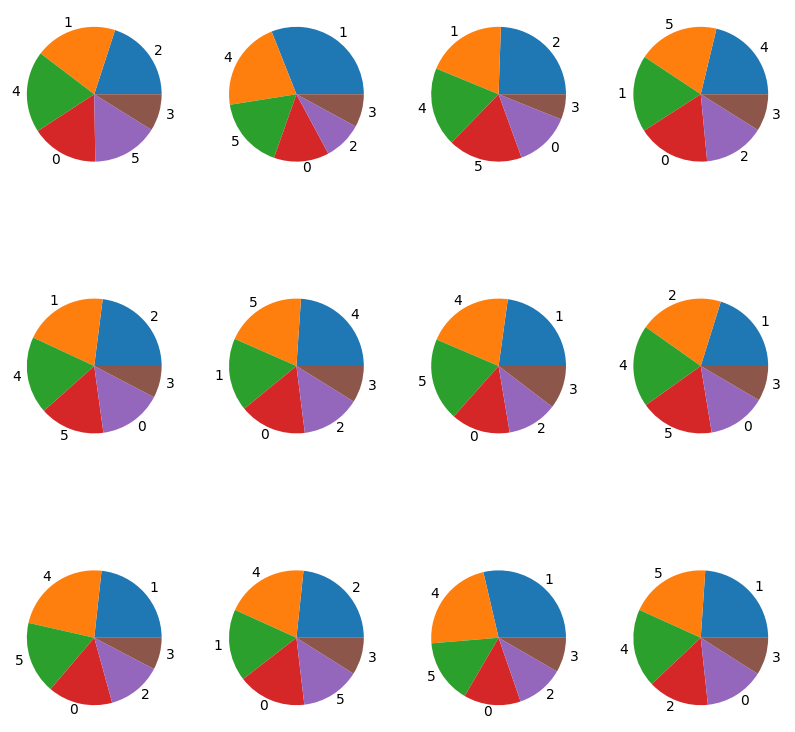

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

data_to_plot = generos['genero'][generos['clave'] == 0].value_counts()
axes[0,0].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 1].value_counts()
axes[0,1].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 2].value_counts()
axes[0,2].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 3].value_counts()
axes[0,3].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 4].value_counts()
axes[1,0].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 5].value_counts()
axes[1,1].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 6].value_counts()
axes[1,2].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 7].value_counts()
axes[1,3].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 8].value_counts()
axes[2,0].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 9].value_counts()
axes[2,1].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 10].value_counts()
axes[2,2].pie(data_to_plot, labels=data_to_plot.index)
data_to_plot = generos['genero'][generos['clave'] == 11].value_counts()
axes[2,3].pie(data_to_plot, labels=data_to_plot.index);

plt.show()

Como vemos, para cada una de las claves, la distribución de canciones por género es bastante parecida por lo que el modelo puede tener problemas a la hora de identificar un género basándose en esta variable

* MODO

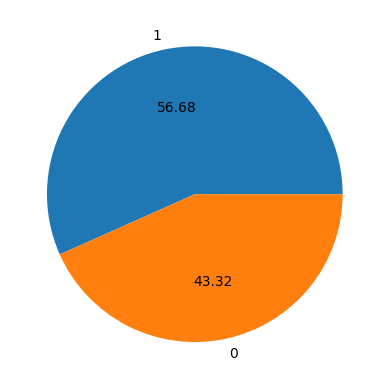

In [87]:
plt.pie(generos['modo'].value_counts(), labels=generos['modo'].unique(), autopct='%.2f');

La variable de modo tiene los valores de escala mayor y menor bastante equilibrados. La escala menor correponde al 0 (42,83%) y la mayor al 1 (57,17%)

* TEMPO

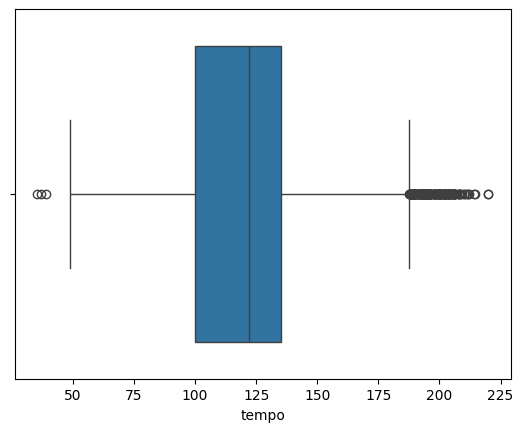

In [88]:
sns.boxplot(generos['tempo'], orient='h');

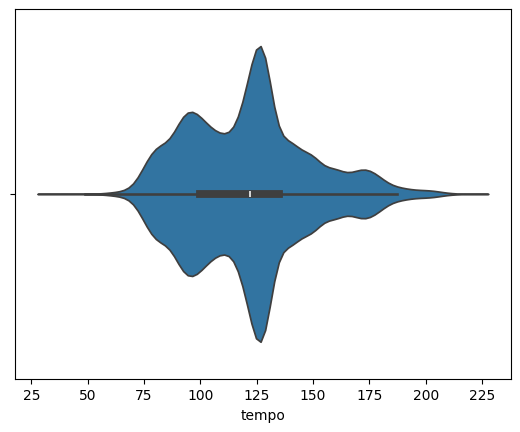

In [89]:
sns.violinplot(generos['tempo'], orient='h');

La distribución es bastante desigual, apreciamos dos modas en torno a los valores 125 y 100. Dejaremos esta variable como está ya que la distribución bimodal puede ser valiosa a la hora de extraer relaciones entre variables y géneros

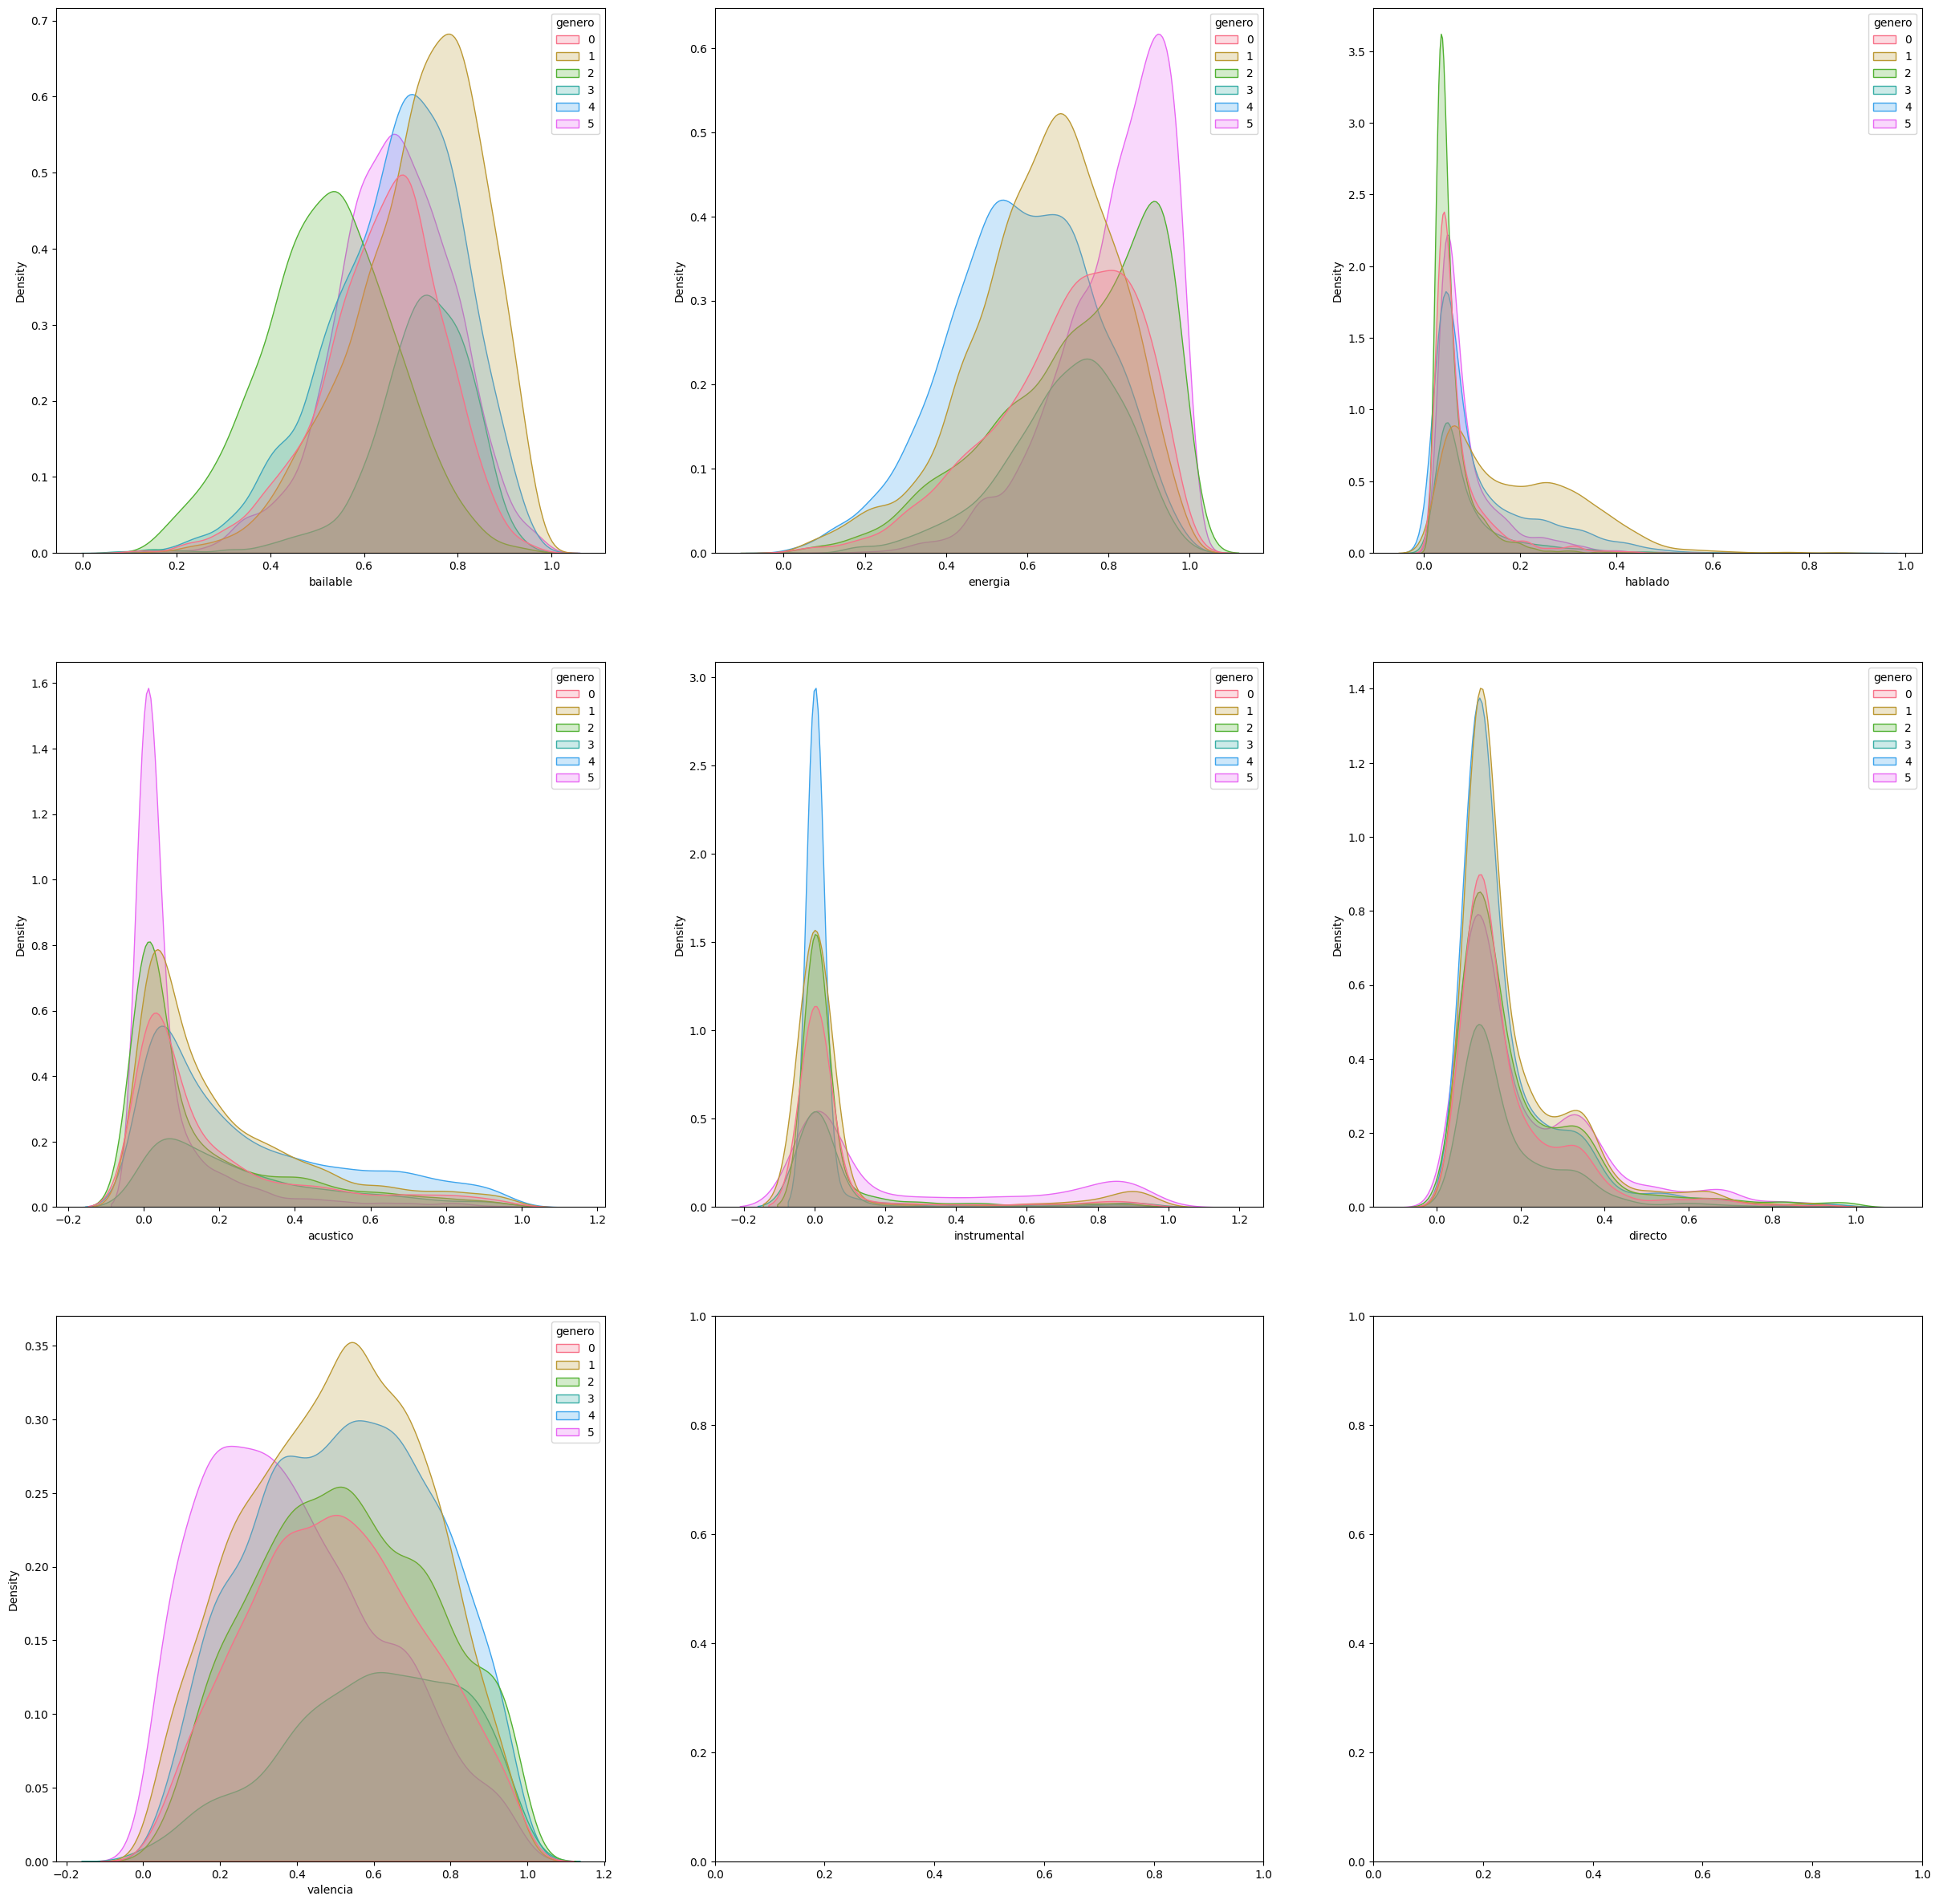

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
colores = sns.color_palette("husl", 6)

sns.kdeplot(data=generos, x='bailable', hue='genero', fill=True, palette=colores, ax=axes[0,0])

sns.kdeplot(data=generos, x='energia', hue='genero', fill=True, palette=colores, ax=axes[0,1])

sns.kdeplot(data=generos, x='hablado', hue='genero', fill=True, palette=colores, ax=axes[0,2])

sns.kdeplot(data=generos, x='acustico', hue='genero', fill=True, palette=colores, ax=axes[1,0])

sns.kdeplot(data=generos, x='instrumental', hue='genero', fill=True, palette=colores, ax=axes[1,1])

sns.kdeplot(data=generos, x='directo', hue='genero', fill=True, palette=colores, ax=axes[1,2])

sns.kdeplot(data=generos, x='valencia', hue='genero', fill=True, palette=colores, ax=axes[2,0])

plt.show()

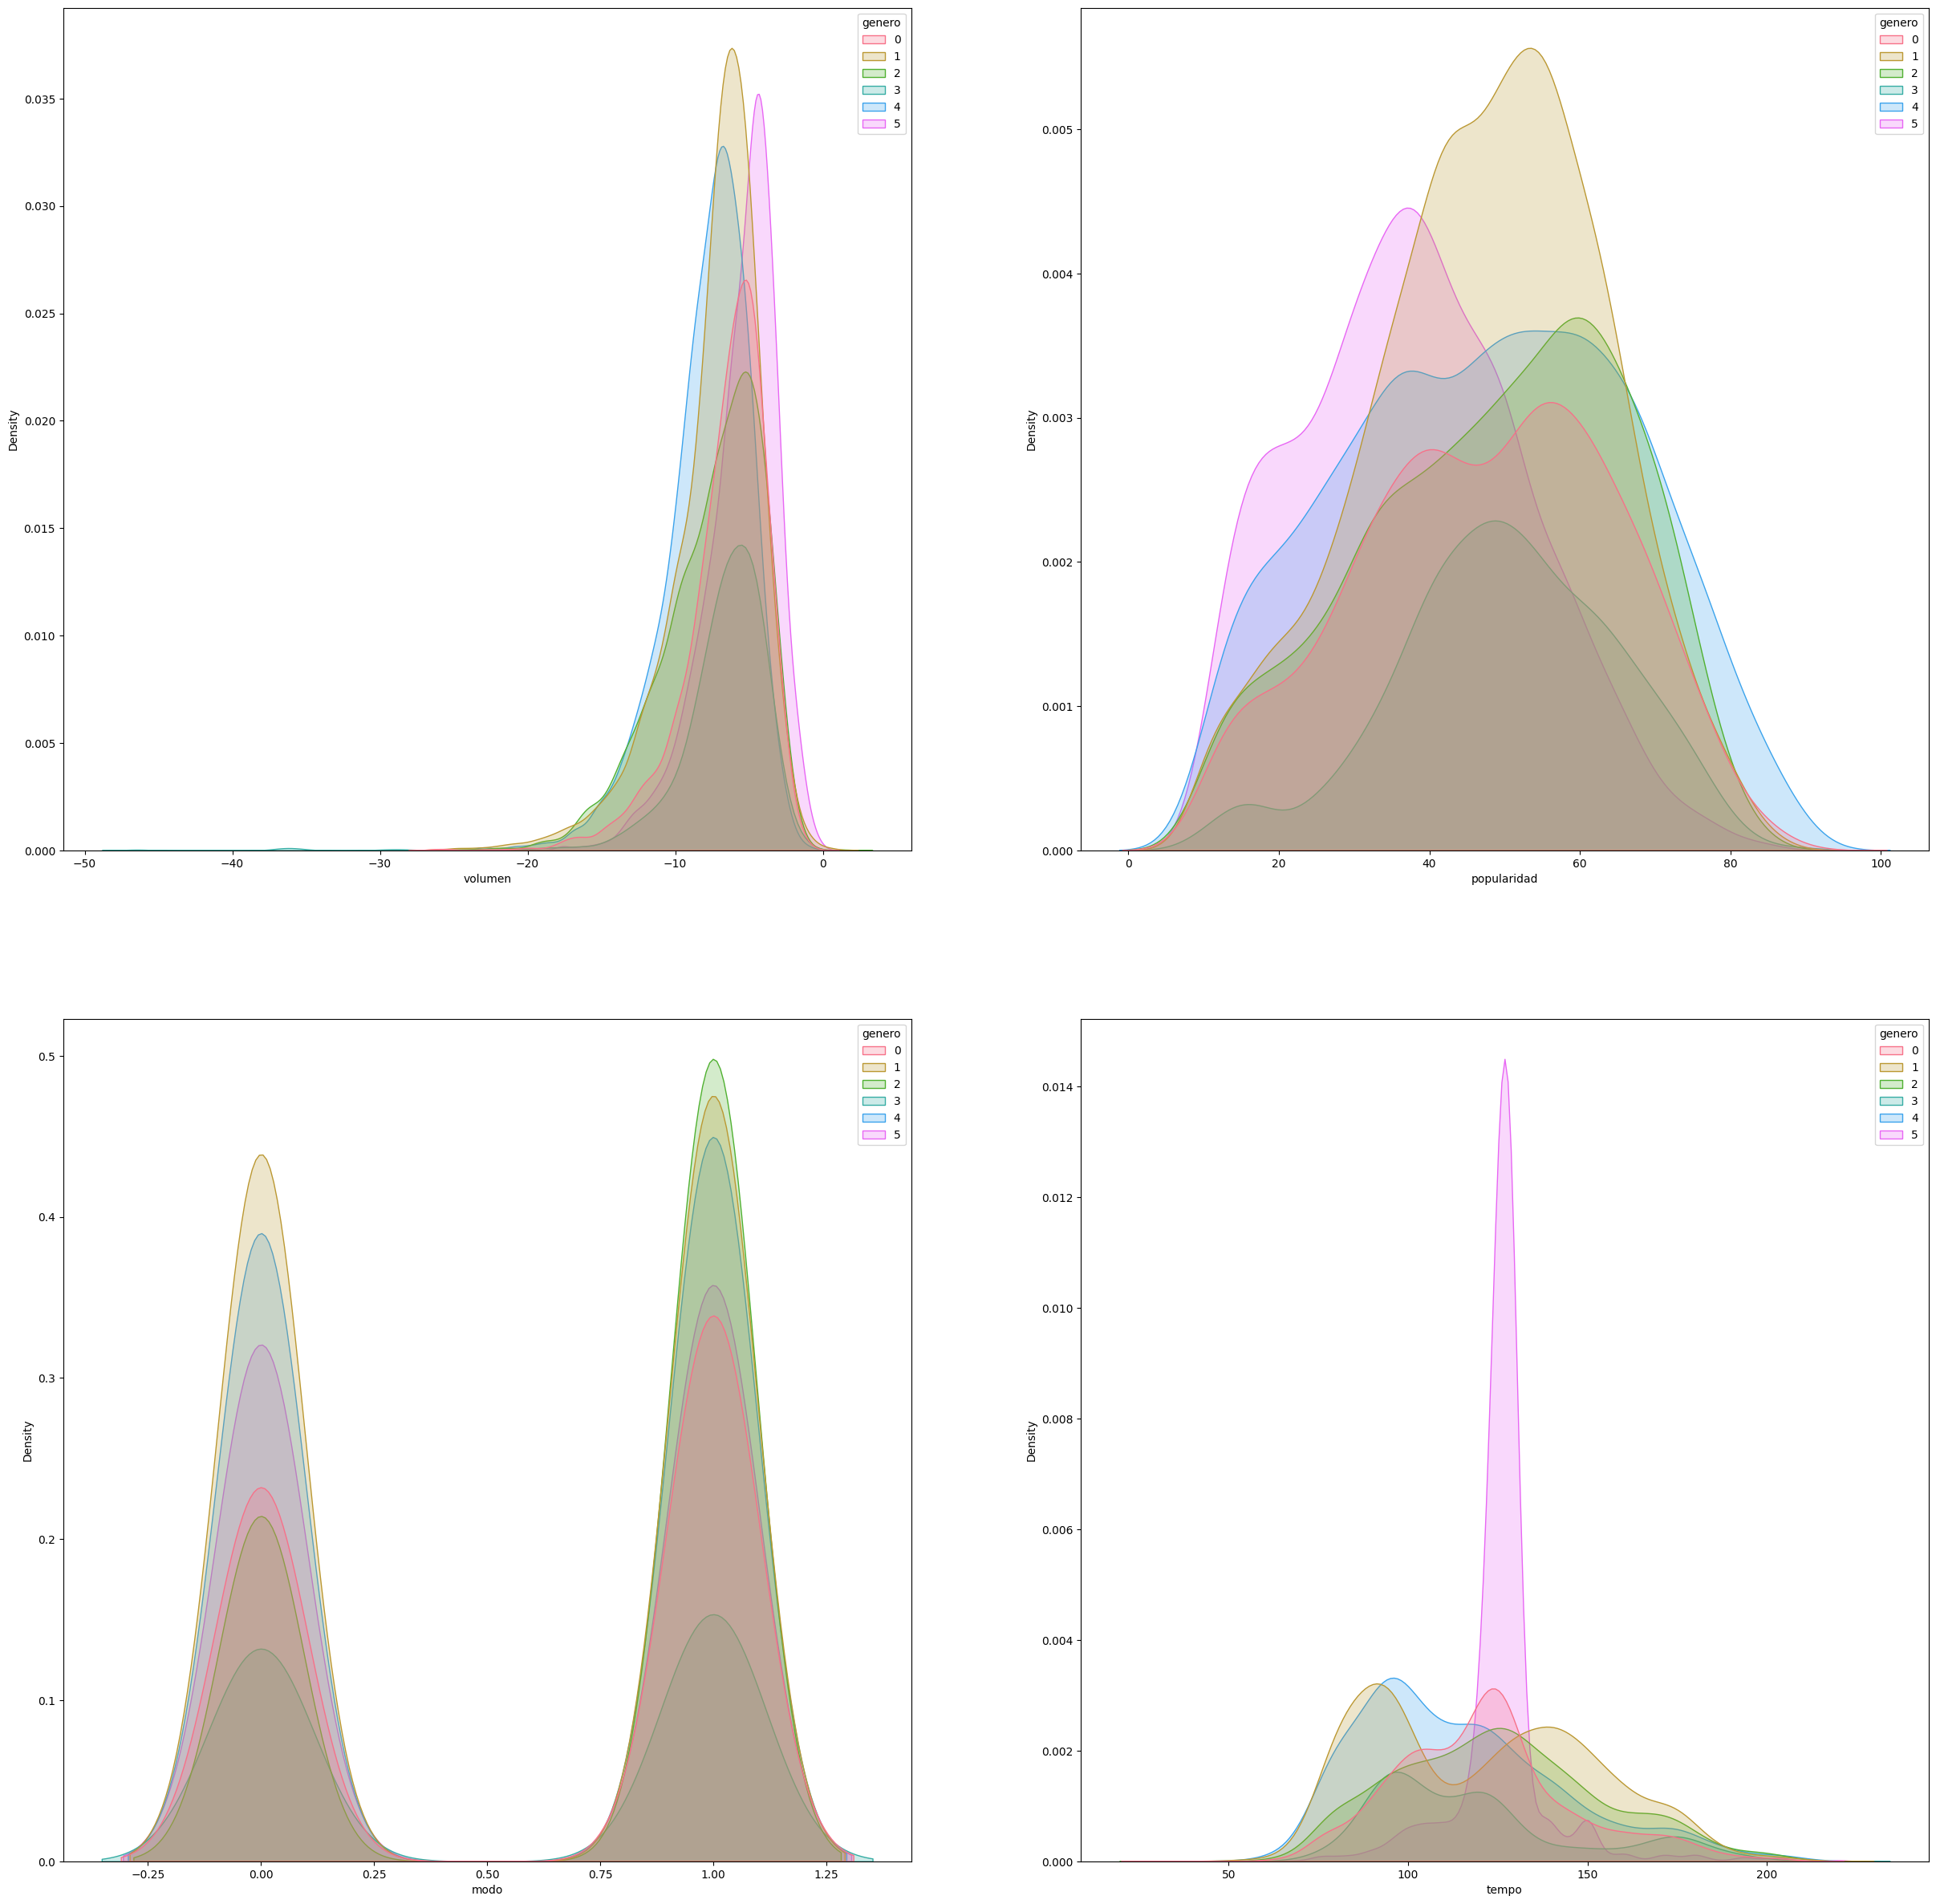

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))
colores = sns.color_palette("husl", 6)

sns.kdeplot(data=generos, x='volumen', hue='genero', fill=True, palette=colores, ax=axes[0,0])

sns.kdeplot(data=generos, x='popularidad', hue='genero', fill=True, palette=colores, ax=axes[0,1])

sns.kdeplot(data=generos, x='modo', hue='genero', fill=True, palette=colores, ax=axes[1,0])

sns.kdeplot(data=generos, x='tempo', hue='genero', fill=True, palette=colores, ax=axes[1,1])

plt.show()

Vemos que algunas variables no distinguen bien entre modelos, es decir, en ciertas variables podemos tener canciones con los mismos valores pero de muchos géneros diferentes, por lo que podríamos decir que en base a esa variable no se puede diferenciar el género. Vamos a probar con todas las columnas y también quedándonos solo con las variables que parecen más representativas y probar cómo cambian las predicciones.

In [53]:
generos_malos = generos[(generos['genero'] == 0) | (generos['genero'] == 3) | (generos['genero'] == 4)]
generos_buenos = generos[(generos['genero'] == 1) | (generos['genero'] == 2) | (generos['genero'] == 5)]

In [54]:
generos_malos['genero'].unique()

array([0, 3, 4], dtype=int64)

In [55]:
generos_malos['genero'] = generos_malos['genero'].replace({0: 0, 3: 1, 4: 2})

C:\Users\Ibai Valente Lavado\AppData\Local\Temp\ipykernel_13476\2170177587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generos_malos['genero'] = generos_malos['genero'].replace({0: 0, 3: 1, 4: 2})


In [58]:
generos_malos['genero'].unique()

array([0, 1, 2], dtype=int64)

In [59]:
generos_buenos['genero'].unique()

array([1, 2, 5], dtype=int64)

In [60]:
generos_buenos['genero'] = generos_buenos['genero'].replace({1: 0, 2: 1, 5: 2})

C:\Users\Ibai Valente Lavado\AppData\Local\Temp\ipykernel_13476\3560697124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generos_buenos['genero'] = generos_buenos['genero'].replace({1: 0, 2: 1, 5: 2})


In [62]:
generos_buenos['genero'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
#generos.to_csv('../data/generos_sin_mezclas.csv', index=False)

In [63]:
# generos_malos.to_csv('../data/generos_malos.csv', index=False)
# generos_buenos.to_csv('../data/generos_buenos.csv', index=False)

In [90]:
#generos.to_csv('../data/generos_todo.csv', index=False)

In [110]:
#generos.to_csv('../data/generos_sin_mezclas.csv', index=False)

In [91]:
generos_resumido = generos[['bailable','energia','valencia','acustico','instrumental','popularidad','tempo','genero']]
#generos_resumido.to_csv('../data/generos_resumido.csv',index=False)

In [92]:
generos_muy_resumido = generos[['bailable','energia','valencia','popularidad','tempo','genero']]
#generos_muy_resumido.to_csv('../data/generos_muy_resumido.csv',index=False)